## **Data Cleaning:**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv(r"C:\Users\BHUMIKA\Downloads\messy_sales_data.csv",encoding="unicode_escape")
df.head(10)

,Customer_ID,Gender,Age,State,Occupation,Orders,Amount
0,CUST1000,f,49.0,delhi,Engineer,7.0,Three Hundred
1,CUST1001,NaN,22.0,maharastra,NaN,8.0,500
2,CUST1002,f,48.0,Delhi,Teacher,9.0,500
3,CUST1003,NaN,24.0,Delhi,Lawyer,9.0,500
4,CUST1004,NaN,22.0,KA,NaN,9.0,500
5,CUST1005,M,27.0,NaN,engineer,NaN,500
6,CUST1006,NaN,30.0,delhi,engineer,NaN,NaN
7,CUST1007,Male,39.0,Karnataka,Engineer,5.0,NaN
8,CUST1008,Male,29.0,Delhi,NaN,6.0,300
9,CUST1009,M,37.0,NaN,Artist,7.0,500


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer_ID  1030 non-null   object 
 1   Gender       868 non-null    object 
 2   Age          933 non-null    float64
 3   State        905 non-null    object 
 4   Occupation   888 non-null    object 
 5   Orders       981 non-null    float64
 6   Amount       888 non-null    object 
dtypes: float64(2), object(5)
memory usage: 56.5+ KB


In [71]:
df.isnull().sum()

Customer_ID      0
Gender         162
Age             97
State          125
Occupation     142
Orders          49
Amount         142
dtype: int64

In [256]:
# Create a new Product_Category column and use numpy and insert random values.
categories = ['Electronics', 'Clothing', 'Home', 'Books', 'Beauty']

# Randomly assign a product category to each row
np.random.seed(42) 
df['Product_Category'] = np.random.choice(categories, size=len(df))


In [73]:
df['Gender'].unique()

array(['f', nan, 'M', 'Male', 'F', 'Female'], dtype=object)

In [75]:
df['Gender']=df['Gender'].replace({'f':'Female','M':'Male','F':'Female'}) #replaced and grouped the values into Male and Female
df['Gender']=df['Gender'].fillna('Not specified')

In [77]:
df['Gender'].unique()

array(['Female', 'Not specified', 'Male'], dtype=object)

In [91]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df.tail()

,Customer_ID,Gender,Age,State,Occupation,Orders,Amount
1025,CUST1585,Male,56.0,Karnataka,Engineer,6.0,500
1026,CUST1444,Female,56.0,Tamil Nadu,Undefined,8.0,Three Hundred
1027,CUST1732,Female,51.0,Tamil Nadu,Lawyer,5.0,100
1028,CUST1076,Female,46.0,Tamil Nadu,Engineer,9.0,200
1029,CUST1411,Female,18.0,Karnataka,Undefined,3.0,100


In [81]:
df['State'].unique()

array(['delhi', 'maharastra', 'Delhi', 'KA', nan, 'Karnataka',
       'Tamil Nadu', 'Maharashtra', 'TN'], dtype=object)

In [83]:
df['State']=df['State'].replace({'TN':'Tamil Nadu','delhi':'Delhi','KA':'Karnataka','maharastra':'Maharashtra'})
df['State']=df['State'].fillna('Others')

In [85]:
df['State'].unique()

array(['Delhi', 'Maharashtra', 'Karnataka', 'Others', 'Tamil Nadu'],
      dtype=object)

In [87]:
df['Occupation']=df['Occupation'].fillna('Undefined')
df['Occupation'].unique()

array(['Engineer', 'Undefined', 'Teacher', 'Lawyer', 'engineer', 'Artist',
       'Doctor'], dtype=object)

In [89]:
df['Occupation']=df['Occupation'].replace({'engineer':'Engineer'})
df['Occupation'].unique()

array(['Engineer', 'Undefined', 'Teacher', 'Lawyer', 'Artist', 'Doctor'],
      dtype=object)

In [116]:
df['Orders']=df['Orders'].fillna(df['Orders'].mean()).round().astype(int)
df['Age']=df['Age'].round()
df.sample(10)

,Customer_ID,Gender,Age,State,Occupation,Orders,Amount
1011,CUST2011,Female,28.0,Maharashtra,Lawyer,5,500
610,CUST1610,Not specified,22.0,Tamil Nadu,Teacher,3,Three Hundred
758,CUST1758,Not specified,34.0,Tamil Nadu,Artist,2,500
441,CUST1441,Not specified,24.0,Delhi,Artist,7,Three Hundred
263,CUST1263,Female,45.0,Delhi,Engineer,1,200
466,CUST1466,Male,57.0,Karnataka,Doctor,9,200
703,CUST1703,Female,29.0,Maharashtra,Engineer,7,300
864,CUST1864,Not specified,39.0,Tamil Nadu,Artist,4,NaN
664,CUST1664,Male,43.0,Karnataka,Engineer,6,100
832,CUST1832,Female,41.0,Maharashtra,Engineer,7,200


In [112]:
df['Amount'].unique()

array(['Three Hundred', '500', nan, '300', '100', '200'], dtype=object)

In [139]:
from word2number import w2n

# Example: Convert entire Amount column
df['Amount'] = df['Amount'].fillna(df['Amount'].mean().round())
df['Amount'] = df['Amount'].apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)
df.sample(10)

,Customer_ID,Gender,Age,State,Occupation,Orders,Amount
109,CUST1109,Female,47.0,Delhi,Doctor,6,300
288,CUST1288,Male,20.0,Maharashtra,Engineer,3,300
428,CUST1428,Male,26.0,Karnataka,Engineer,4,500
893,CUST1893,Female,20.0,Tamil Nadu,Engineer,2,300
983,CUST1983,Female,44.0,Tamil Nadu,Lawyer,5,320
804,CUST1804,Female,22.0,Karnataka,Artist,1,100
752,CUST1752,Female,32.0,Delhi,Undefined,1,320
786,CUST1786,Not specified,40.0,Delhi,Doctor,1,300
91,CUST1091,Female,42.0,Others,Lawyer,5,200
718,CUST1718,Female,38.0,Delhi,Doctor,4,500


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       1030 non-null   object 
 1   Gender            1030 non-null   object 
 2   Age               1030 non-null   float64
 3   State             1030 non-null   object 
 4   Occupation        1030 non-null   object 
 5   Orders            1030 non-null   int32  
 6   Amount            1030 non-null   int64  
 7   Product_Category  1030 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 60.5+ KB


In [150]:
df.isnull().sum()

Customer_ID    0
Gender         0
Age            0
State          0
Occupation     0
Orders         0
Amount         0
dtype: int64

### **There are no null values or missing values. We can move to our next step**

## **Exploratory Data Analysis:**

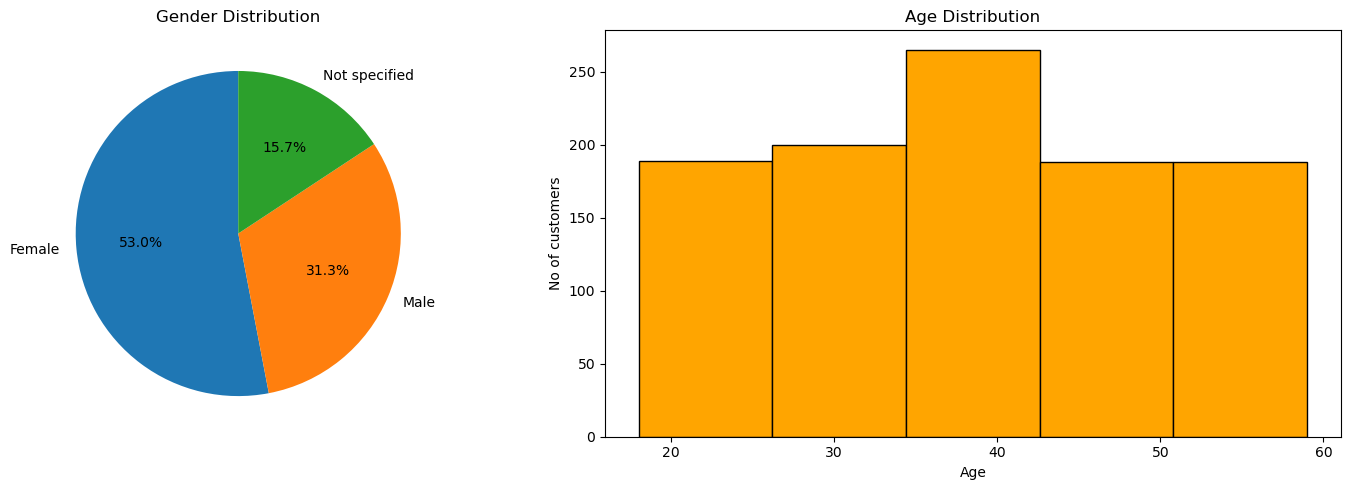

In [193]:
#created subplots to show the distribution side by side in the single figure.

gender_values = df['Gender'].value_counts()

fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0] = plt.subplot(1,2,1)
ax[1] = plt.subplot(1,2,2)

ax[0].pie(gender_values, labels=gender_values.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Gender Distribution')

ax[1].hist(df['Age'], bins=5, color='Orange', edgecolor='Black')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('No of customers')
ax[1].set_title('Age Distribution')

plt.tight_layout()
plt.show()

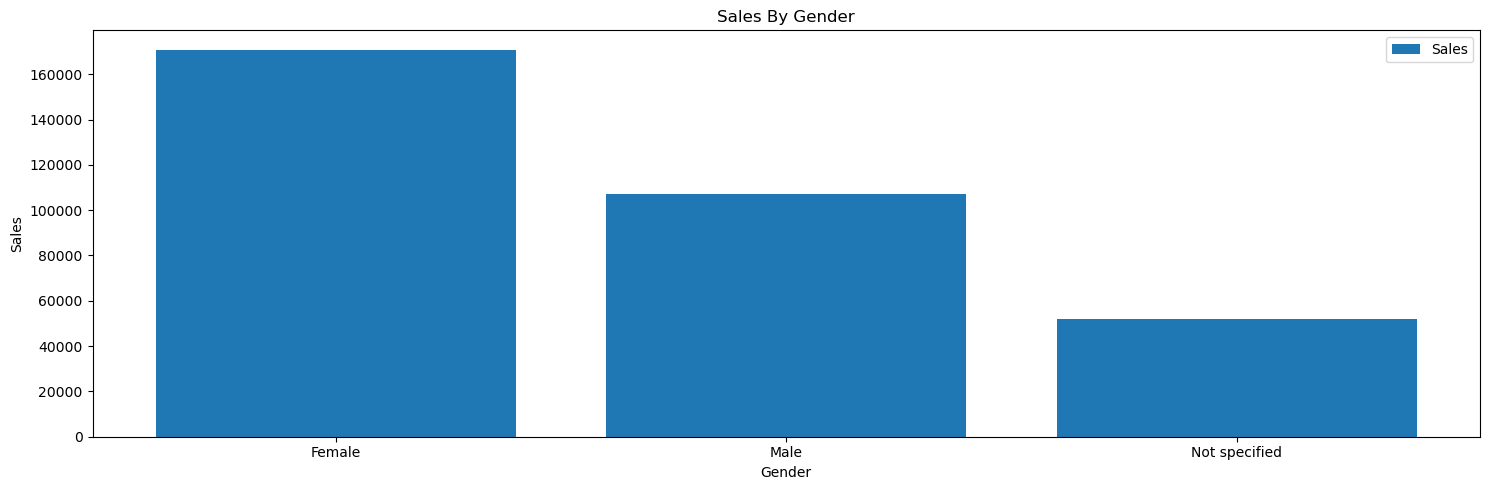

In [239]:
Sales_by_Gender = df.groupby(['Gender'],as_index=False)['Amount'].sum()

plt.figure(figsize=(15,5))
plt.bar(Sales_by_Gender['Gender'], Sales_by_Gender['Amount'] , label='Sales')
plt.xlabel('Gender')
plt.ylabel('Sales')
plt.title('Sales By Gender')
plt.legend()
plt.tight_layout()
plt.show()


#### **From the above graph we can observe that majority of our customers are Female customers.**

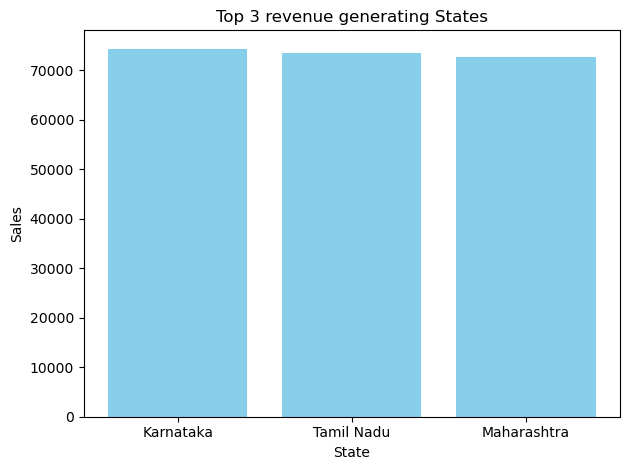

In [241]:
Sales_By_State = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(3)

plt.bar(Sales_By_State['State'], Sales_By_State['Amount'], color='Skyblue')
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Top 3 revenue generating States')
plt.tight_layout()
plt.show()


#### **This bar graph shows us that the Karnataka state is the top performing state in terms of sales.**

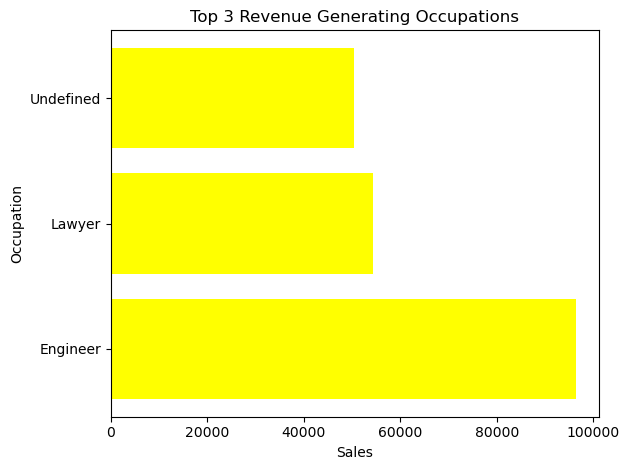

In [243]:
Sales_By_Occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(3)

plt.barh(Sales_By_Occupation['Occupation'], Sales_By_Occupation['Amount'], color='Yellow')
plt.xlabel('Sales')
plt.ylabel('Occupation')
plt.title('Top 3 Revenue Generating Occupations')
plt.tight_layout()
plt.show()

#### **From the above graph we can see that customers working in the field of Engineering are our top customers.**

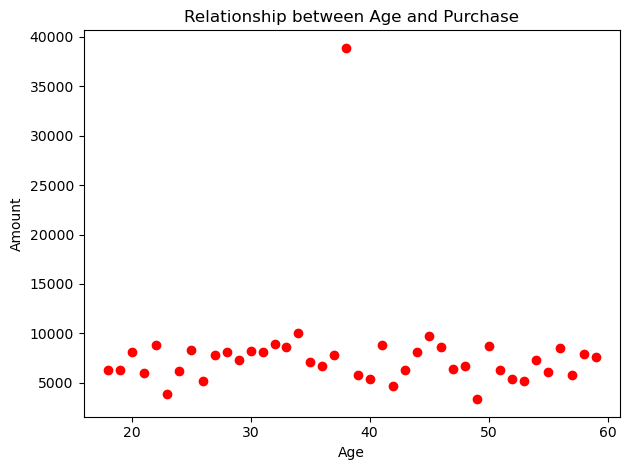

In [247]:
scatter_age = df.groupby(['Age'], as_index=False)['Amount'].sum()

plt.scatter(scatter_age['Age'], scatter_age['Amount'], marker='o', color='Red')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Relationship between Age and Purchase')
plt.tight_layout()
plt.show()

#### **This scatter plot gives the purchase amount per age and we can observe that customers with age 38 are the most revenue generating customers.**

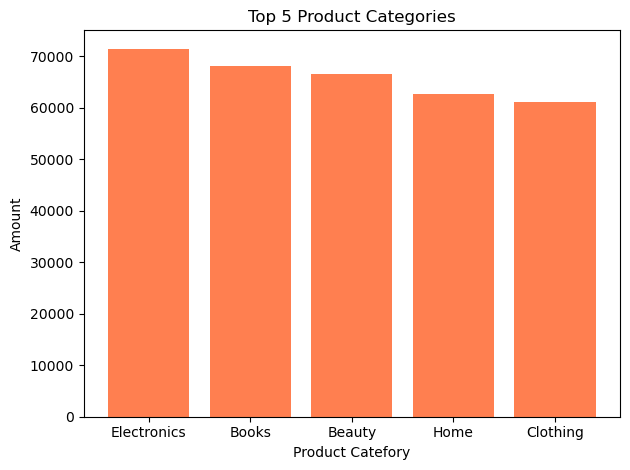

In [276]:
sales_by_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

plt.bar(sales_by_category['Product_Category'], sales_by_category['Amount'], color='Coral')
plt.xlabel('Product Catefory')
plt.ylabel('Amount')
plt.title('Top 5 Product Categories')
plt.tight_layout()
plt.show()

#### **From the above graph we can see that Electronics is the most sold Product Category.**

## **Conclusion:**

#### **Female customers with the age of 38 from the state of Karnataka working in the field of Engineering are our top customers.**

# **THANK YOU**